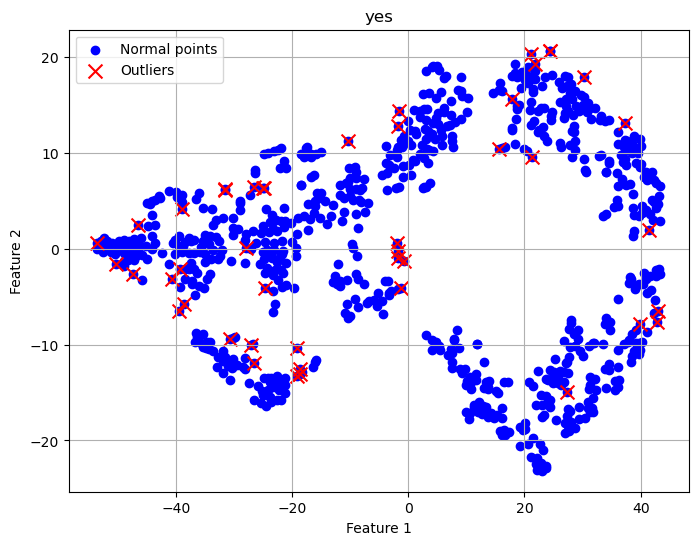

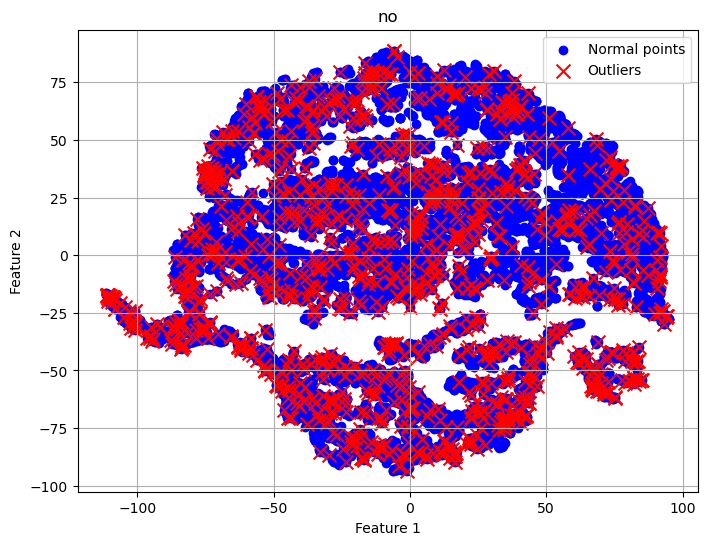

In [10]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

from collections import Counter
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体

from sklearn.manifold import TSNE

data = pd.read_csv("D:\\AI_Code\\Feature_Engineering\\medicareDataNew.csv")

important_columns_first = ['基本统筹基金支付金额_SUM','本次审批金额_SUM','药品费申报金额_SUM','药品费发生金额_SUM',
                           '月药品金额_MAX','月统筹金额_AVG','治疗费申报金额_SUM','ALL_SUM']

# 月药品金额_MAX(医院_药品_MAX和这个差不多，要稍微差一点)

important_columns_second = ['统筹支付金额_SUM','月就诊次数_MAX','就诊次数_SUM','起付标准以上自负比例金额_SUM',
                            '可用账户报销金额_SUM','非账户支付金额_SUM','医院_统筹金_AVG',
                            '月就诊天数_MAX','月就诊天数_AVG','月统筹金额_MAX']
important_columns_third = ['医院_统筹金_MAX','贵重药品发生金额_SUM','医疗救助个人按比例负担金额_SUM',
                           '医疗救助医院申请_SUM','个人账户金额_SUM','一天去两家医院的天数']

important_columns_total = important_columns_first + important_columns_second + important_columns_third

x_data = data.loc[:, important_columns_total]
y_data = data.iloc[:, -1]
x_data_numpy = x_data.to_numpy()
StandardScaler().fit_transform(x_data_numpy)

x_n_no = x_data_numpy[y_data == 0]
x_n_yes = x_data_numpy[y_data == 1]

tsne_yes = TSNE(n_components=2)
x_n_yes_t = tsne_yes.fit_transform(x_n_yes)
tsne_no = TSNE(n_components=2)
x_n_no_t = tsne_no.fit_transform(x_n_no)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor(n_neighbors=5)

# 训练模型并预测异常点

outlier_scores = lof.fit_predict(x_n_yes)

# 可视化数据点

plt.figure(figsize=(8, 6))

# 绘制所有数据点

plt.scatter(x_n_yes_t [:, 0], x_n_yes_t [:, 1], c='b', label='Normal points')

# 标记异常点

outliers = x_n_yes_t[outlier_scores == -1]
plt.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', s=100, label='Outliers')

plt.title('yes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()




# 定义 LOF 模型

lof1 = LocalOutlierFactor(n_neighbors=2)

# 训练模型并预测异常点

outlier_scores_ = lof1.fit_predict(x_n_no)

# 可视化数据点

plt.figure(figsize=(8, 6))

# 绘制所有数据点

plt.scatter(x_n_no_t [:, 0], x_n_no_t [:, 1], c='b', label='Normal points')

# 标记异常点

outliers_ = x_n_no_t[outlier_scores_ == -1]
plt.scatter(outliers_[:, 0], outliers_[:, 1], c='r', marker='x', s=100, label='Outliers')

plt.title('no')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()




In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score, roc_auc_score, accuracy_score 
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
import random
from scipy.stats import ttest_ind

In [12]:
x_yes = x_n_yes[outlier_scores != -1]
x_no = x_n_no[outlier_scores_ != -1]

In [13]:
x_yes,x_no

(array([[7.064730e+03, 7.849700e+03, 6.935600e+03, ..., 0.000000e+00,
         1.081990e+03, 0.000000e+00],
        [1.542880e+04, 1.714312e+04, 1.531682e+04, ..., 0.000000e+00,
         2.334010e+03, 0.000000e+00],
        [7.156700e+03, 8.945890e+03, 8.871890e+03, ..., 0.000000e+00,
         7.270600e+02, 0.000000e+00],
        ...,
        [5.639478e+04, 7.049351e+04, 1.967391e+04, ..., 0.000000e+00,
         4.574130e+03, 0.000000e+00],
        [5.637075e+04, 6.952168e+04, 3.242228e+04, ..., 0.000000e+00,
         1.469929e+04, 1.100000e+01],
        [2.587621e+04, 3.072016e+04, 2.717252e+04, ..., 0.000000e+00,
         5.118100e+03, 7.000000e+00]]),
 array([[1.524776e+04, 1.694204e+04, 1.592904e+04, ..., 0.000000e+00,
         1.970990e+03, 0.000000e+00],
        [9.824150e+03, 1.091575e+04, 1.041895e+04, ..., 0.000000e+00,
         1.371570e+03, 0.000000e+00],
        [1.549832e+04, 1.784003e+04, 1.392688e+04, ..., 0.000000e+00,
         2.637200e+03, 8.000000e+00],
        ...,


In [14]:
x_yes.shape,x_no.shape

((748, 24), (14032, 24))

#### 连接数据

In [15]:
import numpy as np

# 创建标签数组
yes_labels = np.ones(len(x_yes))  # 1代表是类别
no_labels = np.zeros(len(x_no))    # 0代表非类别

# 合并数据和标签
X = np.concatenate((x_yes, x_no), axis=0)
y = np.concatenate((yes_labels, no_labels))

print(X.shape)  # 输出数据集的形状
print(y.shape)  # 输出标签数组的形状

#标准化
# X = StandardScaler().fit_transform(X)


(14780, 24)
(14780,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(11824, 24) (2956, 24) (11824,) (2956,)


In [18]:
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
def get_ExtraTree_accuracy(X_train,X_valid,y_train,y_valid):
    """
        定义函数，计算smote之后，测试原数据的准确率
    """
    # log_clf = LogisticRegression(C=1e5,class_weight='balanced',n_jobs=-1,random_state=666)
    # clf3 = log_clf.fit(X_train,y_train)
    # y_pred3 = clf3.predict(X_valid)
    # y_pred3_prob = clf3.predict_proba(X_valid)[:,1]
    
    extraTree_clf2 = ExtraTreesClassifier(max_depth=None,min_samples_split=2,n_estimators=150)
    clf3 = extraTree_clf2.fit(X_train,y_train)
    y_pred1 = clf3.predict(X_valid)
    y_pred1_prob = clf3.predict_proba(X_valid)[:,1]

    # gauss_clf = GaussianNB()
    # clf3 = gauss_clf.fit(X_train,y_train)
    # y_pred1 = clf3.predict(X_valid)
    # y_pred1_prob = clf3.predict_proba(X_valid)[:,1]

    # randforest_clf = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_split=5,class_weight='balanced')
    # clf1 = randforest_clf.fit(X_train,y_train)
    # y_pred1 = clf1.predict(X_valid)
    # y_pred1_prob = clf1.predict_proba(X_valid)

    # gradientBoost_clf_create2 = GradientBoostingClassifier(n_estimators=100,max_depth=8,min_samples_split=4,learning_rate=0.01)
    # clf3 = gradientBoost_clf_create2.fit(X_train,y_train)
    # y_pred1 = clf3.predict(X_valid)
    # y_pred1_prob = clf3.predict_proba(X_valid)[:,1]

    # xgb_clf = xgb.XGBClassifier(objective='binary:logistic',n_estimators=300,max_depth=5, learning_rate=0.1)
    # xgb_clf = xgb.XGBClassifier(objective='binary:logistic',n_estimators=300,reg_alpha=0.5,reg_lambda=1.0,max_depth=5, learning_rate=0.1)
    # clf3 = xgb_clf.fit(X_train,y_train)
    # y_pred1 = clf3.predict(X_valid)
    # y_pred1_prob = clf3.predict_proba(X_valid)[:,1]

    # svm_clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr',probability=True)  # 这里使用线性核函数
    # clf2 = svm_clf.fit(X_train, y_train)
    # y_pred1 = clf2.predict(X_valid)
    # y_pred1_prob = clf2.predict_proba(X_valid)


    # def distribute_weight(array1, array2):
    # results = []
    # for index in range(y_pred1_prob.shape[0]):
    #     list1 = y_pred1_prob[index]  # 拿到每个一维数组
    #     list2 = y_pred2_prob[index]
    #     not_fraud_rate = list1[0]*0.5 + list2[0]*0.5
    #     fraud_rate = 1 - not_fraud_rate
    #     # fraud_rate = list1[1]*0.5 + list2[1]*0.5
    #     if fraud_rate > not_fraud_rate:
    #         results.append(1)
    #     else:
    #         results.append(0)
            
    # # # return np.array(results)
    # results = np.array(results)

    dismatch_X = []
    dismatch_y = []
    match_X = []
    prob = []
    prob2 = []
    for index in range(y_valid.shape[0]):
        if(y_valid[index] != y_pred1[index]):
            dismatch_X.append(X_valid[index])
            dismatch_y.append(y_valid[index])
            
            prob.append(y_pred1_prob[index])

        elif (y_valid[index] == y_pred1[index] and y_valid[index]==1):
            match_X.append(X_valid[index])
            prob2.append(y_pred1_prob[index])
            # print(y_pred3_prob[index])

    
            # print(X_valid[index])
    # print(dismatch_array)
    
    # print("\tBrier: %1.5f" % (brier_score_loss(y_valid,y_pred3)))
    # print("\tPrecision: %1.5f" % precision_score(y_valid, y_pred3)) 
    # print("\tRecall: %1.5f" % recall_score(y_valid, y_pred3))  
    # print("\tF1: %1.5f" % f1_score(y_valid, y_pred3)) 
    # print("\tauc: %1.5f" % roc_auc_score(y_valid, y_pred3_prob))
    # print("\tAccuracy: %1.5f\n" % accuracy_score(y_valid, results))
    print("\tAccuracy: %1.5f\n" % accuracy_score(y_valid, y_pred1))
    return dismatch_X,dismatch_y,match_X,prob,prob2

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
sm = SMOTE(random_state=666)
X_res, y_res = sm.fit_resample(X_train, y_train)     #即完成了合成
print(X_res.shape, y_res.shape)

(22482, 24) (22482,)


In [20]:
dismatch_X,dismatch_y,match_X,prob,prob2 = get_ExtraTree_accuracy(X_train,X_test,y_train,y_test)

	Accuracy: 0.95704



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
from keras.optimizers import SGD
from keras.layers import Dropout

def get_neural_network_accuracy(X_train, X_valid, y_train, y_valid, class_weight=None, epochs=150, batch_size=10, optimizer='adam', hidden_units=8, dropout_rate=0.2):
    """
    使用神经网络模型进行二分类，并返回不匹配的数据点及其标签
    optimizer (str): 优化器
    hidden_units (int): 隐藏层神经元数量
    dropout_rate (float): Dropout比率，可选参数
    """
    # 创建神经网络模型
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    elif optimizer == 'sgd':
        model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
    else:
        raise ValueError("Unknown optimizer: {}".format(optimizer))
    
    # 训练神经网络模型，使用类别权重（如果提供）
    if class_weight:
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, class_weight=class_weight)
    else:
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # 在验证集上进行预测
    y_pred = np.round(model.predict(X_valid)).astype(int)
    
    # 寻找不匹配的数据点
    dismatch_X = []
    dismatch_y = []
    for index in range(y_valid.shape[0]):
        if y_valid[index] != y_pred[index]:
            dismatch_X.append(X_valid[index])
            dismatch_y.append(y_valid[index])
    
    # 计算准确度
    accuracy = accuracy_score(y_valid, y_pred)
    
    return dismatch_X, dismatch_y, accuracy
